#**<center><font color = "navy">TITANIC DATASET-Classification and EDA</font></center>**

<center><img src = "https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExdnlmdjRwajV0bHlndjA0OTdydDhkaXoyNHg4d2psajI3dWQ1ZzhtMSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/XpzQjrE95ZTSW52WH9/giphy.gif"></center>

**Table Content**

1. [Importing Libraries](#import)
2. [Reading Data](#read)
3. [Data Wrangling](#wran)
4. [Performing EDA](#eda)
5. [Feature Engineering](#feat)
6. [ML - Various Models](#ml)

#**<font color = "teal">Importing Libraries</font><a class = "anchor" id = "import"></a>**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#**<font color = "teal">Reading Data</font><a class = "anchor" id = "read"></a>**

In [ ]:
data = pd.read_csv("/content/titanic_data.csv")
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


#**<font color = "teal">Data Wrangling</font><a class = "anchor" id = "wran"></a>**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Cleaning**

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<center><img src = "https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExNDVvbXRydGxmMWRqZWQzb28zYnVqcGh5YW55eHd6ZzNqZmhseTVveSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/9ABgKHIu3acWA/giphy.gif"></center>

#**<font color = "teal">Performing EDA</font><a class = "anchor" id = "eda"></a>**

**Numerical Value Analysis**

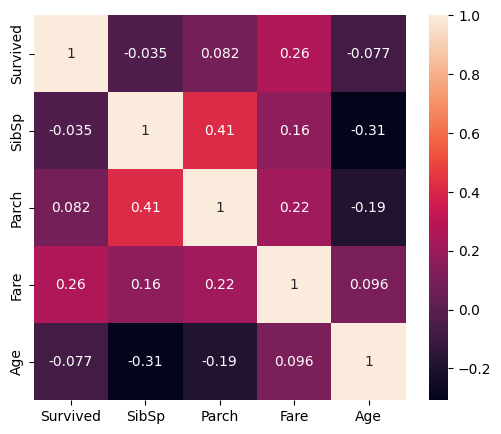

In [ ]:
plt.figure(figsize=(6,5))
heatmap=sns.heatmap(data[["Survived","SibSp","Parch","Fare","Age"]].corr(), annot=True)

In [ ]:
data["SibSp"].nunique()

7

In [ ]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

**Exploring relationship between variables**

<Figure size 600x500 with 0 Axes>

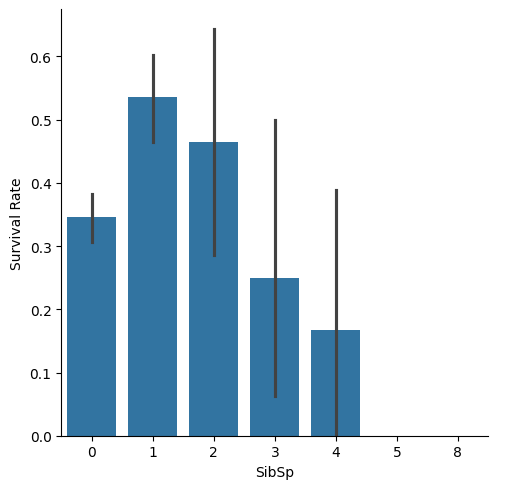

In [ ]:
#A bar plot to visualise the relationship between SibSp and Survival
plt.figure(figsize=(6,5))
plot = sns.catplot(x="SibSp", y="Survived", data=data , kind="bar")
plot.set(ylabel="Survival Rate")
plt.show()

<Figure size 600x500 with 0 Axes>

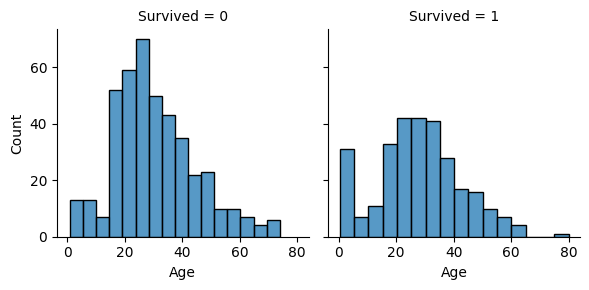

In [ ]:
#TO visually compare the age distributions of those who survived versus those who did not.
plt.figure(figsize=(6,5))
age_visual=sns.FacetGrid(data, col="Survived") # Create a FacetGrid with 'Survived' as the column to separate the data
age_visual.map(sns.histplot, "Age") # Map a histogram plot of the 'Age' variable to each facet
plt.show()

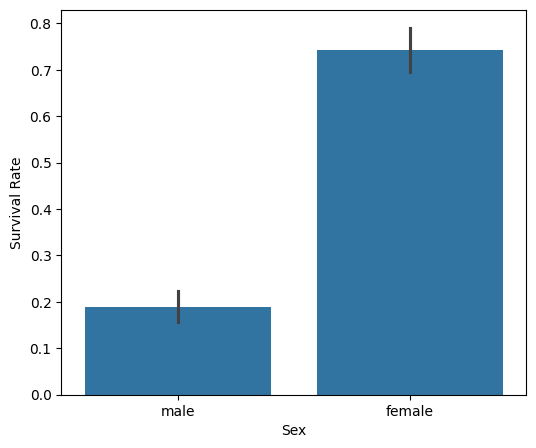

In [ ]:
#To visually compare survival probability of survival based on sex.
plt.figure(figsize=(6,5))
sex_plot=sns.barplot(x="Sex",y="Survived",data=data,).set_ylabel("Survival Rate")
plt.show()

<Figure size 600x500 with 0 Axes>

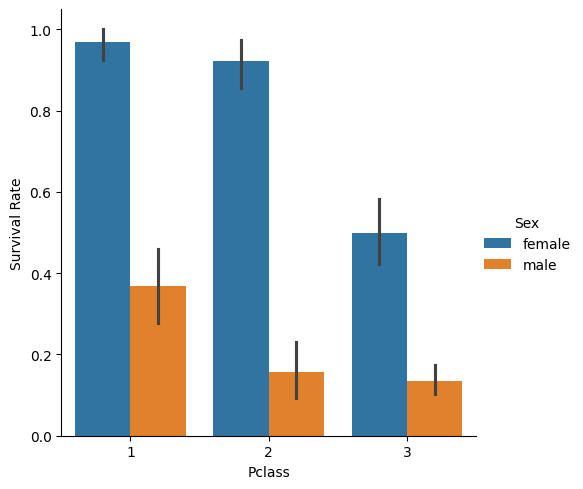

In [ ]:
#To visually compare survival probability based on Pclass as a criterion.
plt.figure(figsize=(6,5))
plot=sns.catplot(x="Pclass",y="Survived",data=data,kind="bar", hue="Sex")
plot.set(ylabel="Survival Rate")
plt.show()

**Filling missing values**

In [ ]:
# 1.Count of total values.
data["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
# 2.Fill missing values in the 'Embarked' column with 'S' (assuming 'S' is the most common or default value).
data["Embarked"]=data["Embarked"].fillna("S")

In [ ]:
data["Embarked"].isnull().sum()

0

<Figure size 600x500 with 0 Axes>

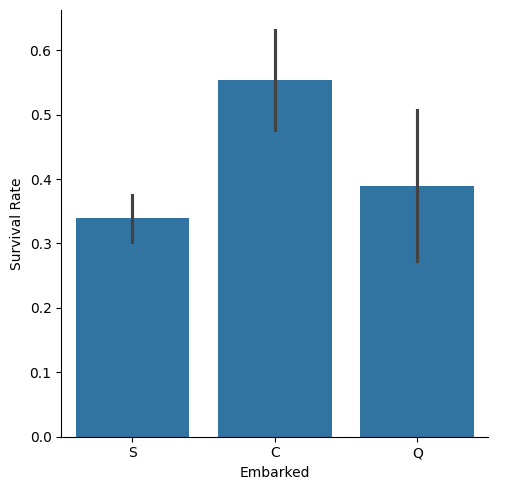

In [ ]:
#To visually compare survival probability based on Embarked as a criterion.
plt.figure(figsize=(6,5))
plot=sns.catplot(x="Embarked",y="Survived",data=data,kind="bar")
plot.set(ylabel="Survival Rate")
plt.show()

<Figure size 600x500 with 0 Axes>

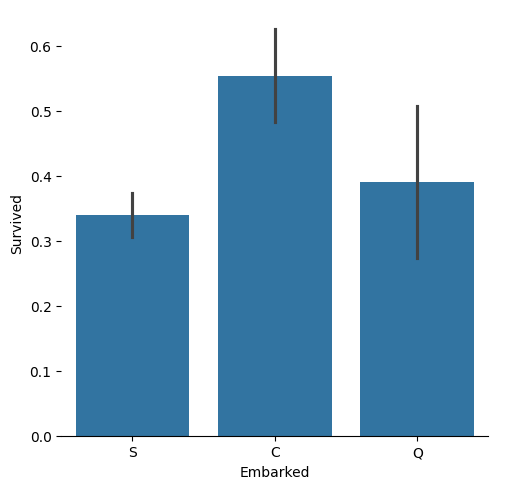

In [ ]:
#Explore Pclass vs Embarked
plt.figure(figsize=(6,5))
g=sns.catplot(x="Embarked",y="Survived", data=data, kind="bar" ).despine(left=True)

#**<font color = "teal">Feature Engineering</font><a class = "anchor" id = "feat"></a>**

**Preparing Data**

In [ ]:
mean=data["Age"].mean()
std=data["Age"].std()

isnull=data["Age"].isnull().sum()

In [ ]:
print(mean,
       std,
       isnull)

29.69911764705882 14.526497332334042 177


**Assigning random age values**

In [ ]:
# Generate random ages within the range (mean-std) to (mean+std) for missing values
random_age = np.random.randint(mean - std, mean + std, size=isnull.sum())

In [ ]:
random_age

array([32, 21, 32, 17, 26, 20, 20, 20, 41, 31, 24, 41, 25, 19, 17, 17, 28,
       42, 24, 38, 20, 39, 23, 19, 43, 16, 19, 38, 34, 24, 40, 15, 16, 17,
       31, 38, 40, 25, 33, 33, 30, 16, 41, 19, 35, 18, 18, 29, 33, 30, 20,
       22, 25, 31, 23, 40, 43, 26, 41, 18, 36, 18, 21, 23, 25, 41, 39, 30,
       33, 35, 28, 41, 27, 31, 21, 21, 42, 33, 30, 32, 33, 24, 37, 29, 37,
       16, 17, 20, 25, 29, 43, 29, 39, 42, 33, 15, 32, 31, 33, 20, 43, 17,
       33, 20, 42, 16, 41, 29, 25, 23, 19, 35, 36, 27, 23, 34, 36, 19, 24,
       22, 41, 36, 32, 35, 27, 38, 34, 27, 38, 37, 32, 41, 33, 36, 18, 38,
       38, 18, 21, 39, 43, 15, 19, 27, 29, 26, 37, 18, 34, 28, 31, 37, 37,
       40, 42, 43, 28, 22, 39, 37, 27, 33, 32, 33, 21, 28, 16, 40, 22, 43,
       41, 17, 19, 18, 32, 30, 34])

In [ ]:
age_copy=data["Age"].copy()

In [ ]:
age_copy

,Age
0,22.00
1,38.00
2,26.00
3,35.00
4,35.00
5,NaN
6,54.00
7,2.00
8,27.00
9,14.00


In [ ]:
# To Ensure random_age has the same length as the number of NaN values in age_copy
if len(random_age) == np.isnan(age_copy).sum():
    age_copy[np.isnan(age_copy)] = random_age
else:
    raise ValueError("Length of random_age does not match the number of NaN values in age_copy")

In [ ]:
data["Age"]=age_copy

In [ ]:
data["Age"].isnull().sum()

0

**Droping Columns**

In [ ]:
col_to_drop=["PassengerId","Cabin","Name","Ticket"]
data.drop(col_to_drop, axis =1, inplace=True)

In [ ]:
data.head(11)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,32.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


**Assigning quantitative values to qualitative data**

In [ ]:
#Assigning Values to sex parameter.
gender={"male": 0,"female": 1}
data["Sex"]=data["Sex"].map(gender)

In [ ]:
data.head(11)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
5,0,3,0,32.0,0,0,8.4583,Q
6,0,1,0,54.0,0,0,51.8625,S
7,0,3,0,2.0,3,1,21.0750,S
8,1,3,1,27.0,0,2,11.1333,S
9,1,2,1,14.0,1,0,30.0708,C


In [ ]:
#Assigning values to Embarked parameter.
ports={"S": 0,"C": 1,"Q": 2}
data["Embarked"]=data["Embarked"].map(ports)

In [ ]:
data.head(11)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,32.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


#**<font color = "teal">ML-Various Models</font><a class = "anchor" id = "ml"></a>**

**Splitting the data into x and y**

In [ ]:
# Droping the first column from the DataFrame and assigning the result to x
x = data.drop(data.columns[[0]], axis=1)

# Assigning the 'Survived' column to y
y = data["Survived"]

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,34.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


**Splitting the data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
857,1,0,51.0,0,0,26.5500,0
52,1,1,49.0,1,0,76.7292,1
386,3,0,1.0,5,2,46.9000,0
124,1,0,54.0,0,1,77.2875,0
578,3,1,41.0,1,0,14.4583,1
...,...,...,...,...,...,...,...
835,1,1,39.0,1,1,83.1583,1
192,3,1,19.0,1,0,7.8542,0
629,3,0,41.0,0,0,7.7333,2
559,3,1,36.0,1,0,17.4000,0


In [ ]:
y_train

,Survived
857,1
52,1
386,0
124,0
578,0
549,1
118,0
12,0
157,0
127,1


**Scalling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

**Classification**

In [ ]:
#Initializing Classifiers
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000,criterion="entropy", random_state=0)

**Training**

In [ ]:
#Training Classifiers
logreg.fit(x_train , y_train)
svc_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

**Prediction**

In [ ]:
#Making Predictions
logreg_ypred=logreg.predict(x_test)
svc_classifier_ypred=svc_classifier.predict(x_test)
dt_classifier_ypred=dt_classifier.predict(x_test)
knn_classifier_ypred=knn_classifier.predict(x_test)
rf_classifier_ypred=rf_classifier.predict(x_test)

**Evaluation**

In [ ]:
#Evaluating accuracy score.
from sklearn.metrics import accuracy_score
logreg_acc=accuracy_score (y_test,logreg_ypred)
svc_classifier_acc=accuracy_score (y_test,svc_classifier_ypred)
dt_classifier_acc=accuracy_score (y_test,dt_classifier_ypred)
knn_classifier_acc=accuracy_score (y_test,knn_classifier_ypred)
rf_classifier_acc=accuracy_score (y_test,rf_classifier_ypred)

In [ ]:
print("Logistic Regression      :", round(logreg_acc*100, 2))
print("Support Vector Machine   :", round(svc_classifier_acc*100, 2))
print("Decision Tree            :", round(dt_classifier_acc*100, 2))
print("K-nearest Classifier     :", round(knn_classifier_acc*100, 2))
print("Random Forest Classifier :", round(rf_classifier_acc*100, 2))

Logistic Regression      : 79.85
Support Vector Machine   : 81.72
Decision Tree            : 77.61
K-nearest Classifier     : 80.97
Random Forest Classifier : 82.09
